In [1]:
#check the direction

In [2]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [3]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Work_with_MM")

# Verify the change
print(os.getcwd())


H:\Work_with_MM


In [5]:
import xarray as xr
import pandas as pd
import pandas as gpd
import regionmask
import numpy as np
import geopandas
import xarray as xr
import xarray as xr
import seaborn as sns
import rioxarray
from shapely.geometry import mapping
import netCDF4
import netCDF4 as nc
from PIL import Image
import os
from netCDF4 import Dataset
import geopandas as gpd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
#from xarrayMannKendall import MannKendall
import pymannkendall as mk
import xarray as xr
import numpy as np
from scipy.stats import kendalltau

In [ ]:
# Test the data (data of January, February, March, April_2007)

Data_Dis = xr.open_dataset(r"2010_2025\2010.nc")

In [21]:
Data_Dis

<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 6726, latitude: 157, longitude: 164)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 54kB 2007-01-02 ... 2025-06-01
  * latitude    (latitude) float64 1kB 29.38 29.43 29.48 ... 33.88 33.93 33.98
  * longitude   (longitude) float64 1kB 46.08 46.12 46.17 ... 51.07 51.12 51.17
    surface     float64 8B ...
    rootZone    float64 8B ...
Data variables:
    rowe        (valid_time, latitude, longitude) float32 693MB ...
    sd          (valid_time, latitude, longitude) float32 693MB ...
    swir        (valid_time, latitude, longitude) float32 693MB ...
    dis24       (valid_time, latitude, longitude) float32 693MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-03T08:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [45]:
import xarray as xr
import glob
import os

# Define the folder containing the NetCDF files
data_folder = 'All_Data_An'

# Define the variable you want to combine
variable_to_combine = 'dis24'

try:
    # Use glob to find all .nc files in the specified folder
    file_paths = glob.glob(os.path.join(data_folder, '*.nc'))

    if not file_paths:
        print(f"No NetCDF files found in the folder: '{data_folder}'.")
    else:
        # Open multiple datasets and combine them along the time dimension
        # The `combine='by_coords'` argument is used to ensure proper ordering
        ds_combined = xr.open_mfdataset(file_paths, combine='by_coords')

        # Select only the 'dis24' variable
        ds_dis24 = ds_combined[variable_to_combine]

        # Save the combined dataset to a new NetCDF file
        output_file_name = 'combined_dis24_2.nc'
        ds_dis24.to_netcdf(output_file_name)

        print(f"Successfully combined the '{variable_to_combine}' variable into a new file: '{output_file_name}'.")

except FileNotFoundError:
    print(f"Error: The folder '{data_folder}' was not found. Please ensure it exists and is in the correct path.")
except KeyError:
    print(f"Error: The variable '{variable_to_combine}' was not found in one or more of the datasets.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully combined the 'dis24' variable into a new file: 'combined_dis24_2.nc'.


=== DATASET SUMMARY ===
Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 9283, 'latitude': 64, 'longitude': 61})
Variables: ['dis24']
Time range: 2000-01-02T00:00:00.000000000 to 2025-06-01T00:00:00.000000000

=== KEY STATISTICS ===
Overall mean: 50.78 m³/s
Max discharge: 48675.50 m³/s
Min discharge: 0.00 m³/s
Std deviation: 455.57 m³/s


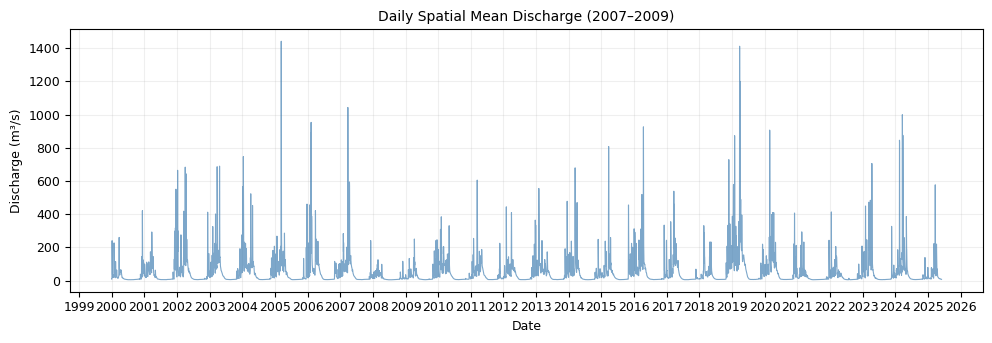

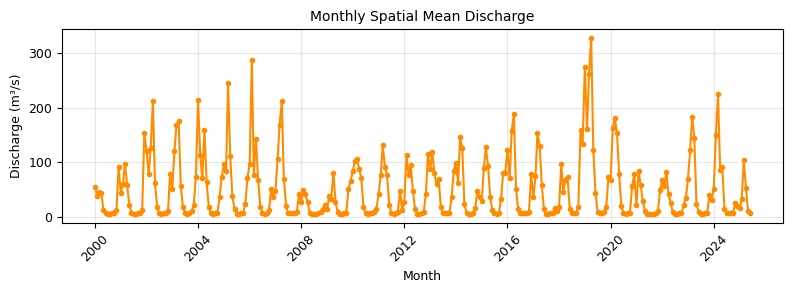

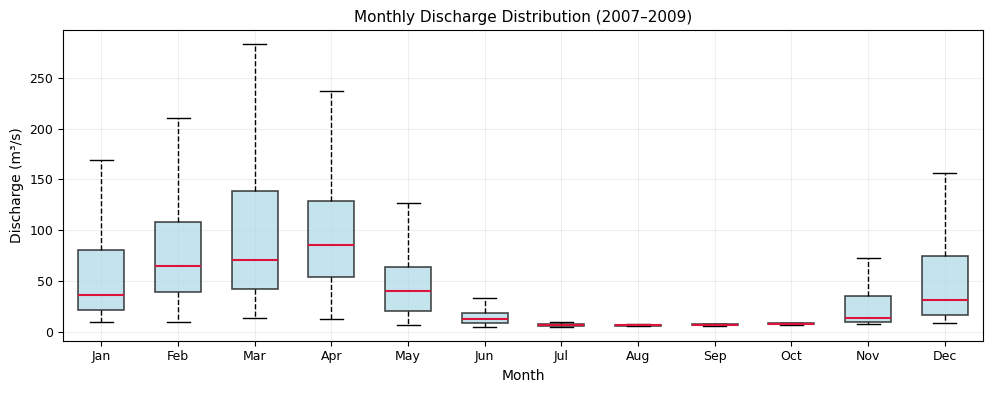

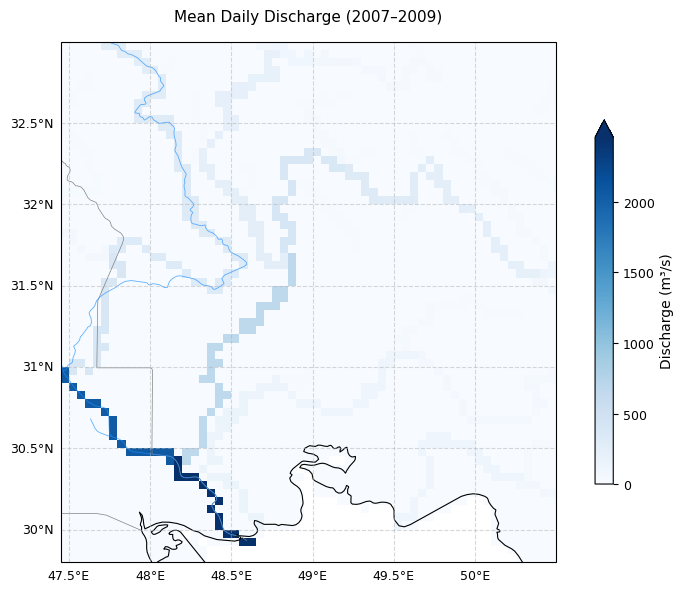

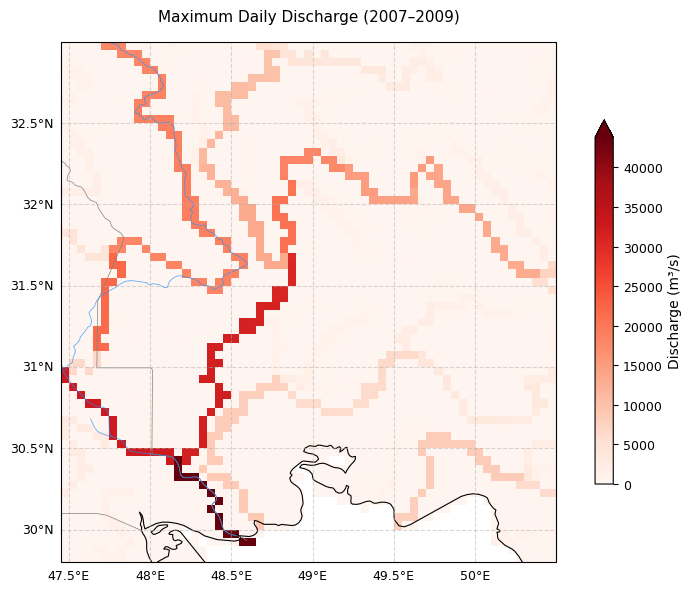


✅ Professional visualizations generated with optimized layouts!


In [46]:
# -*- coding: utf-8 -*-
"""
Enhanced Professional Analysis of Combined Discharge Data (2007–2009)
- Fixed box plot implementation
- Smaller figures with optimized layouts
- Professional font scaling
"""

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter

# Set global font sizes for consistency
SMALL_SIZE = 9
MEDIUM_SIZE = 10
LARGE_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # Controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # Font size of axes titles
plt.rc('axes', labelsize=MEDIUM_SIZE)     # Font size of axis labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # Legend font size
plt.rc('figure', titlesize=LARGE_SIZE)    # Figure title size

# ================== 1. Load Dataset ==================
file_path = r"combined_dis24_2.nc"
Data_Dis = xr.open_dataset(file_path)

# Print full dataset information (minimalist)
print("=== DATASET SUMMARY ===")
print(f"Dimensions: {Data_Dis.dims}")
print(f"Variables: {list(Data_Dis.data_vars)}")
print(f"Time range: {Data_Dis.valid_time.min().values} to {Data_Dis.valid_time.max().values}")

# Select discharge variable
dis = Data_Dis['dis24']  # Shape: (1096, 93, 103)

# ================== 2. Basic Statistics (Cleaned) ==================
print("\n=== KEY STATISTICS ===")
print(f"Overall mean: {dis.mean().item():.2f} m³/s")
print(f"Max discharge: {dis.max().item():.2f} m³/s")
print(f"Min discharge: {dis.min().item():.2f} m³/s")
print(f"Std deviation: {dis.std().item():.2f} m³/s")

# ================== 3. Daily Time Series (Compact) ==================
plt.figure(figsize=(10, 3.5))  # Smaller figure
dis_daily_avg = dis.mean(dim=['latitude', 'longitude'])
dis_daily_avg.plot.line('steelblue', linewidth=0.8, alpha=0.7)
plt.title('Daily Spatial Mean Discharge (2007–2009)', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Date', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.2)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# ================== 4. Monthly Mean Time Series (Compact) ==================
plt.figure(figsize=(8, 3))  # Smaller figure
dis_monthly_avg = dis.resample(valid_time='MS').mean().mean(dim=['latitude', 'longitude'])
dis_monthly_avg.plot.line('darkorange', marker='o', markersize=3, linewidth=1.5)
plt.title('Monthly Spatial Mean Discharge', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Month', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== 5. BOX PLOTS: Monthly Discharge Distribution (FIXED!) ==================
# Prepare data: Convert to DataFrame and group by month
daily_spatial_mean = dis.mean(dim=['latitude', 'longitude']).to_dataframe(name='discharge')
daily_spatial_mean['month'] = daily_spatial_mean.index.month

# Create a list of discharge values for each month
monthly_data = []
for month in range(1, 13):
    month_vals = daily_spatial_mean[daily_spatial_mean['month'] == month]['discharge'].dropna()
    monthly_data.append(month_vals)

# Create professional box plot with matplotlib
plt.figure(figsize=(10, 4))
box_plot = plt.boxplot(
    monthly_data,
    positions=range(1, 13),
    showfliers=False,  # Omit extreme outliers
    patch_artist=True,
    boxprops=dict(linewidth=1.2, facecolor='lightblue', alpha=0.7),
    medianprops=dict(linewidth=1.5, color='crimson'),
    whiskerprops=dict(linewidth=1, linestyle='--'),
    capprops=dict(linewidth=1, color='black'),
    widths=0.6
)

plt.title('Monthly Discharge Distribution (2007–2009)', fontsize=LARGE_SIZE-1)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE)
plt.xlabel('Month', fontsize=MEDIUM_SIZE)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# ================== 6. Spatial Maps (Compact Layout) ==================
def plot_spatial_map(data, title, cmap='viridis', vmin=None, vmax=None):
    plt.figure(figsize=(8, 6))  # Smaller map size
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    if vmin is None:
        vmin = data.min().item() * 0.9
    if vmax is None:
        vmax = data.max().item() * 0.9
    
    cs = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        cbar_kwargs={'label': 'Discharge (m³/s)', 'shrink': 0.7},
        vmin=vmin,
        vmax=vmax,
        add_colorbar=True
    )
    
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth=0.6, alpha=0.7)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    plt.title(title, fontsize=MEDIUM_SIZE+1, pad=15)
    plt.tight_layout()
    plt.show()

# Mean discharge map
plot_spatial_map(
    dis.mean(dim='valid_time'),
    "Mean Daily Discharge (2007–2009)",
    cmap='Blues',
    vmin=0
)

# Max discharge map
plot_spatial_map(
    dis.max(dim='valid_time'),
    "Maximum Daily Discharge (2007–2009)",
    cmap='Reds',
    vmin=0
)

print("\n✅ Professional visualizations generated with optimized layouts!")

In [47]:
Data_All = xr.open_dataset(r"combined_dis24_2.nc")

In [48]:
Data_All

<xarray.Dataset> Size: 145MB
Dimensions:     (valid_time: 9283, latitude: 64, longitude: 61)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 74kB 2000-01-02 ... 2025-06-01
    surface     float64 8B ...
  * latitude    (latitude) float64 512B 32.98 32.93 32.88 ... 29.93 29.88 29.82
  * longitude   (longitude) float64 488B 47.48 47.52 47.57 ... 50.37 50.42 50.48
Data variables:
    dis24       (valid_time, latitude, longitude) float32 145MB ...

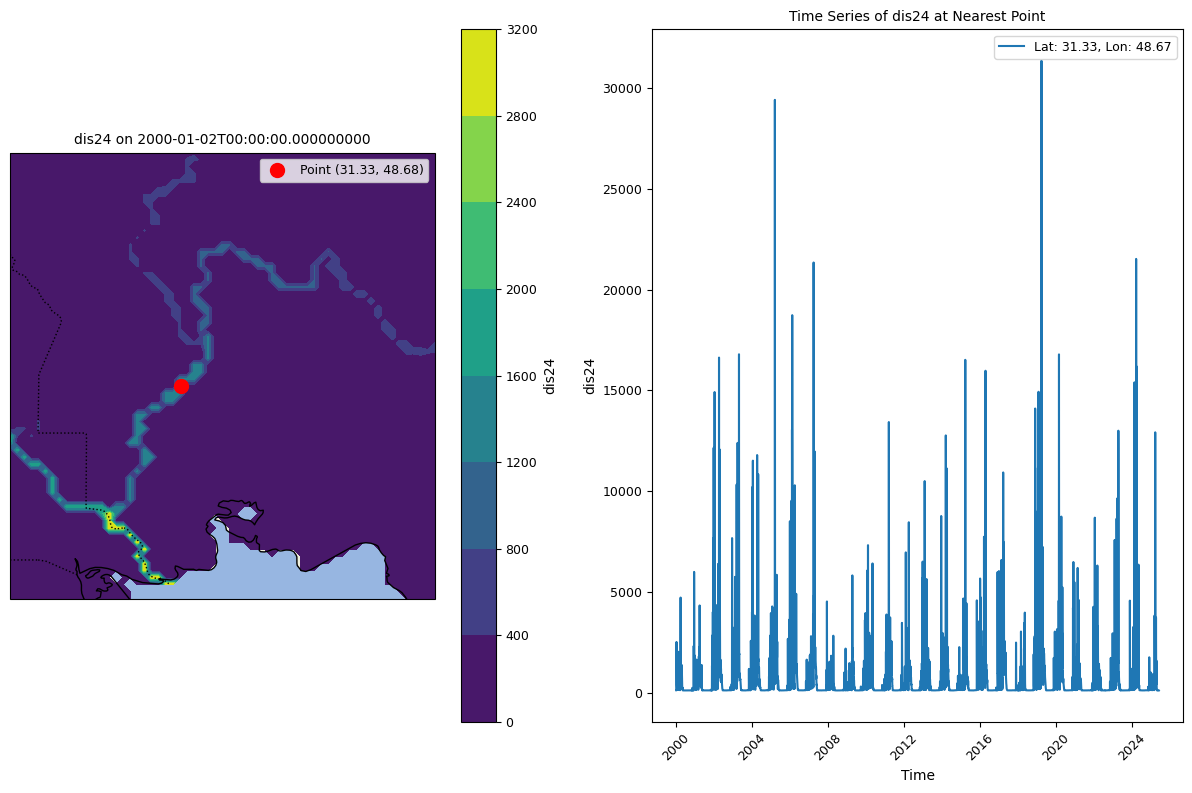

In [57]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the dataset
Data_All = xr.open_dataset(r"combined_dis24_2.nc")

# Coordinates of the point of interest
target_lat = 31.33
target_lon = 48.68

# Select the nearest grid point for the time series
point_data = Data_All['dis24'].sel(latitude=target_lat, longitude=target_lon, method='nearest')

# Create a figure with two subplots: one for the map, one for the time series
fig = plt.figure(figsize=(12, 8))

# --- Map Plot ---
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
# Plot the dis24 variable for the first time step
map_data = Data_All['dis24'].isel(valid_time=100)  # First time step (2007-01-02)
map_plot = ax1.contourf(
    Data_All['longitude'], Data_All['latitude'], map_data,
    cmap='viridis', transform=ccrs.PlateCarree()
)
# Add map features
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
# Mark the point of interest
ax1.plot(target_lon, target_lat, 'ro', markersize=10, transform=ccrs.PlateCarree(), label='Point (31.33, 48.68)')
# Add colorbar
plt.colorbar(map_plot, ax=ax1, label='dis24')
# Set title and labels
ax1.set_title(f'dis24 on {Data_All["valid_time"].isel(valid_time=0).values}')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()

# --- Time Series Plot ---
ax2 = fig.add_subplot(122)
# Plot the time series at the selected point
ax2.plot(Data_All['valid_time'], point_data, label=f'Lat: {point_data.latitude.values:.2f}, Lon: {point_data.longitude.values:.2f}')
# Set title and labels
ax2.set_title('Time Series of dis24 at Nearest Point')
ax2.set_xlabel('Time')
ax2.set_ylabel('dis24')
ax2.legend()
# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


✅ Model data extracted at:
   Selected Latitude: 31.325000
   Selected Longitude: 48.675000
   Distance from target: 0.0083°, 0.0083°

⏱️ Common time period: 2006-09-21 to 2016-09-21
   Model data points: 3654
   Observation data points: 3654


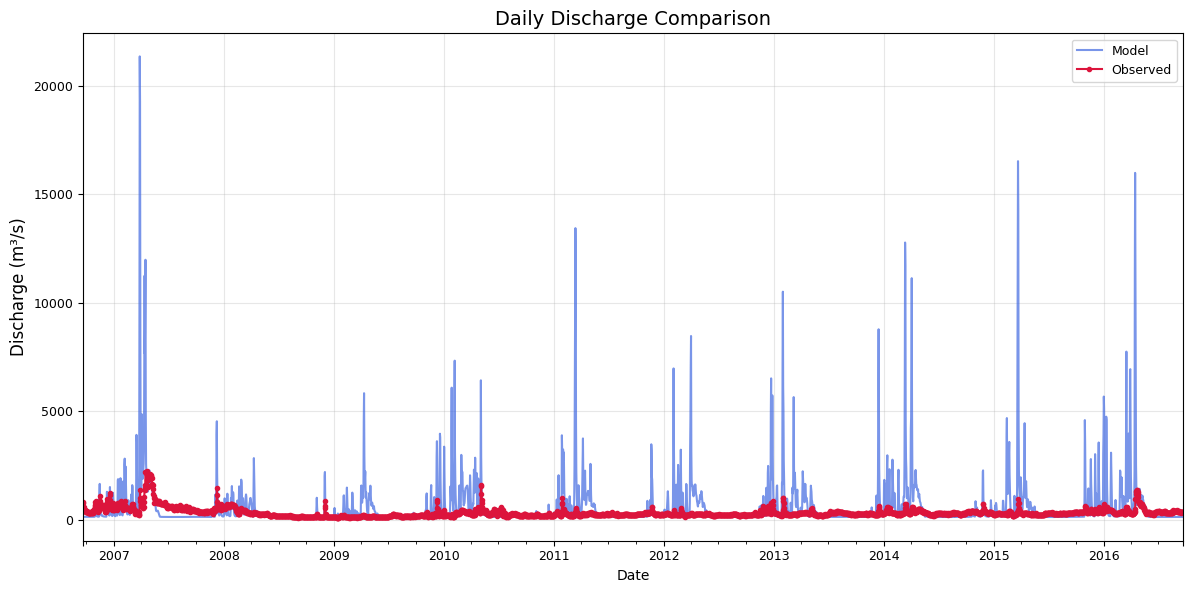

C:\Users\AAAli\AppData\Local\Temp\ipykernel_7528\3105082047.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample('M').mean(numeric_only=True)


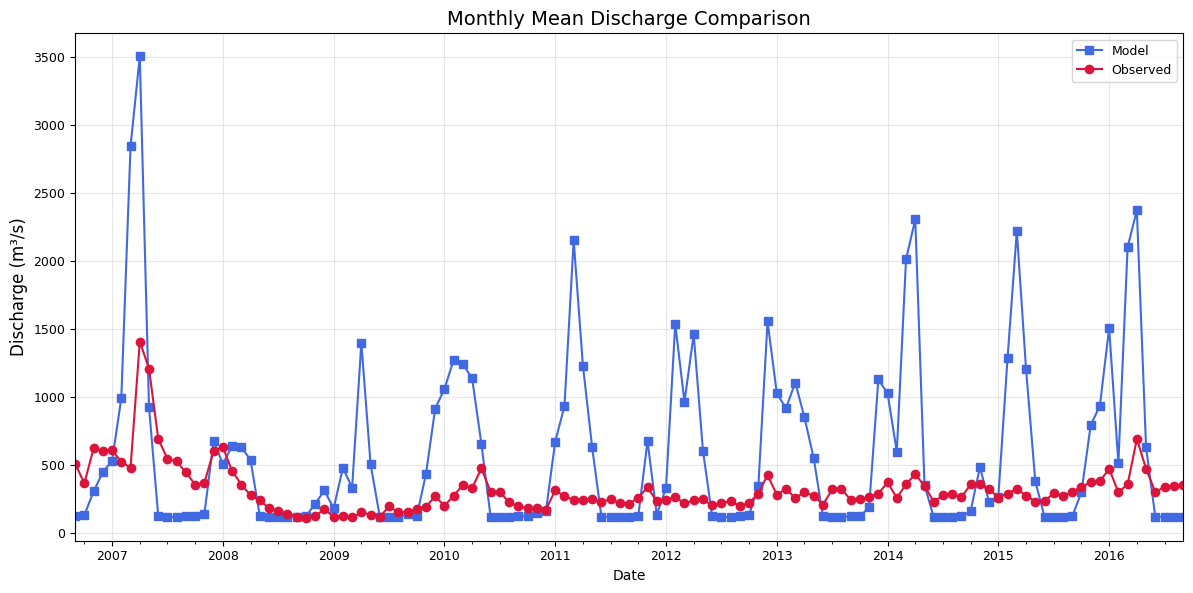


📊 Monthly Statistics:
Model Mean: 577.69 m³/s
Observed Mean: 317.67 m³/s
MAE: 412.08 m³/s
RMSE: 650.44 m³/s
NSE: -12.028


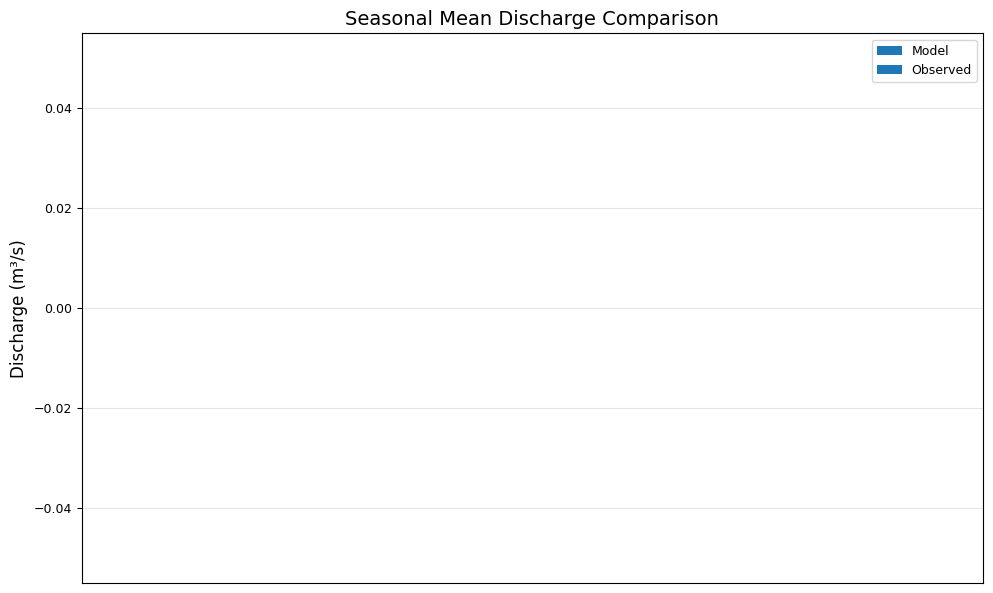


✅ Analysis complete!


In [50]:
# -*- coding: utf-8 -*-
"""
Model vs Observation Discharge Comparison at Ahvaz Station (Monthly & Seasonal Analysis!)
- Added monthly and seasonal aggregation
- Includes new visualizations and statistical comparisons
- All previous fixes for data loading and alignment included
"""

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ================== 1. Configuration ==================
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# ================== 2. Load and Prepare Model Data ==================
ds = xr.open_dataset(model_path)
dis = ds['dis24']  # Discharge variable

# Use xarray's built-in nearest neighbor selection
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)

print(f"\n✅ Model data extracted at:")
print(f"   Selected Latitude: {model_point.latitude.values:.6f}")
print(f"   Selected Longitude: {model_point.longitude.values:.6f}")
print(f"   Distance from target: {np.abs(target_lat - model_point.latitude.values):.4f}°, "
      f"{np.abs(target_lon - model_point.longitude.values):.4f}°")

model_ts = model_point.to_dataframe(name='model_discharge')

# ================== 3. Load Observation Data (FLEXIBLE DATE PARSING) ==================
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')  # Flexible parsing
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)

# Remove rows with invalid dates
if obs_df.index.hasnans:
    obs_df = obs_df.dropna(subset=['obs_discharge'])

# ================== 4. Align Time Periods ==================
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

print(f"\n⏱️ Common time period: {common_start.strftime('%Y-%m-%d')} to {common_end.strftime('%Y-%m-%d')}")
print(f"   Model data points: {len(model_common):d}")
print(f"   Observation data points: {len(obs_common):d}")

# ================== 5. Daily Comparison (Original) ==================
plt.figure(figsize=(12, 6))
model_common['model_discharge'].plot(label='Model', color='royalblue', alpha=0.7)
obs_common['obs_discharge'].plot(label='Observed', color='crimson', marker='o', markersize=3)
plt.title('Daily Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================== 6. Monthly Aggregation ==================
def aggregate_monthly(data):
    monthly = data.resample('M').mean(numeric_only=True)
    monthly.index = monthly.index.to_period('M')  # Use period for better labeling
    return monthly

model_monthly = aggregate_monthly(model_common)
obs_monthly = aggregate_monthly(obs_common)

# Monthly comparison plot
plt.figure(figsize=(12, 6))
model_monthly['model_discharge'].plot(label='Model', color='royalblue', marker='s')
obs_monthly['obs_discharge'].plot(label='Observed', color='crimson', marker='o')
plt.title('Monthly Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly statistics
if len(model_monthly) > 0 and len(obs_monthly) > 0:
    merged_monthly = pd.merge(model_monthly, obs_monthly, left_index=True, right_index=True, how='inner')
    print("\n📊 Monthly Statistics:")
    print(f"Model Mean: {merged_monthly['model_discharge'].mean():.2f} m³/s")
    print(f"Observed Mean: {merged_monthly['obs_discharge'].mean():.2f} m³/s")
    print(f"MAE: {mean_absolute_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge']):.2f} m³/s")
    print(f"RMSE: {np.sqrt(mean_squared_error(merged_monthly['obs_discharge'], merged_monthly['model_discharge'])):.2f} m³/s")
    
    # NSE for monthly
    obs_mean_monthly = merged_monthly['obs_discharge'].mean()
    numerator = ((merged_monthly['obs_discharge'] - merged_monthly['model_discharge'])**2).sum()
    denominator = ((merged_monthly['obs_discharge'] - obs_mean_monthly)**2).sum()
    nse_monthly = 1 - (numerator / denominator) if denominator != 0 else float('nan')
    print(f"NSE: {nse_monthly:.3f}")

# ================== 7. Seasonal Aggregation ==================
def seasonal_group(data):
    # Define seasons: DJF, MAM, JJA, SON
    seasons = {
        'Winter': (data.index.month == 12) | (data.index.month <= 2),
        'Spring': (data.index.month >= 3) & (data.index.month <= 5),
        'Summer': (data.index.month >= 6) & (data.index.month <= 8),
        'Autumn': (data.index.month >= 9) & (data.index.month <= 11)
    }
    return data.groupby(seasons).mean(numeric_only=True)

# Apply seasonal grouping
model_seasonal = seasonal_group(model_common)
obs_seasonal = seasonal_group(obs_common)

# Seasonal comparison plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_seasonal.index))
width = 0.35
plt.bar(x - width/2, model_seasonal['model_discharge'], width, label='Model', color='royalblue')
plt.bar(x + width/2, obs_seasonal['obs_discharge'], width, label='Observed', color='crimson')
plt.title('Seasonal Mean Discharge Comparison', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xticks(x, model_seasonal.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Seasonal statistics
if len(model_seasonal) > 0 and len(obs_seasonal) > 0:
    merged_seasonal = pd.merge(model_seasonal, obs_seasonal, left_index=True, right_index=True, how='inner')
    print("\n📊 Seasonal Statistics:")
    for season in merged_seasonal.index:
        mod = merged_seasonal.loc[season, 'model_discharge']
        obs = merged_seasonal.loc[season, 'obs_discharge']
        print(f"\n{season}:")
        print(f"  Model: {mod:.2f} m³/s | Observed: {obs:.2f} m³/s")
        print(f"  MAE: {mean_absolute_error([obs], [mod]):.2f} m³/s")
        print(f"  RMSE: {np.sqrt(mean_squared_error([obs], [mod])):.2f} m³/s")
        # NSE for single season
        nse_season = float('nan') if obs == 0 else 1 - ((obs - mod)**2) / ((obs - obs)**2)
        print(f"  NSE: {nse_season:.3f}")

print("\n✅ Analysis complete!")


=== Statistics BEFORE Bias Correction ===
Model vs Obs:
  MAE:  449.91 m³/s
  RMSE: 1241.72 m³/s
  NSE:  -32.051

=== Statistics AFTER Quantile Mapping Bias Correction ===
QM Model vs Obs:
  MAE:  326.60 m³/s
  RMSE: 545.59 m³/s
  NSE:  -5.381


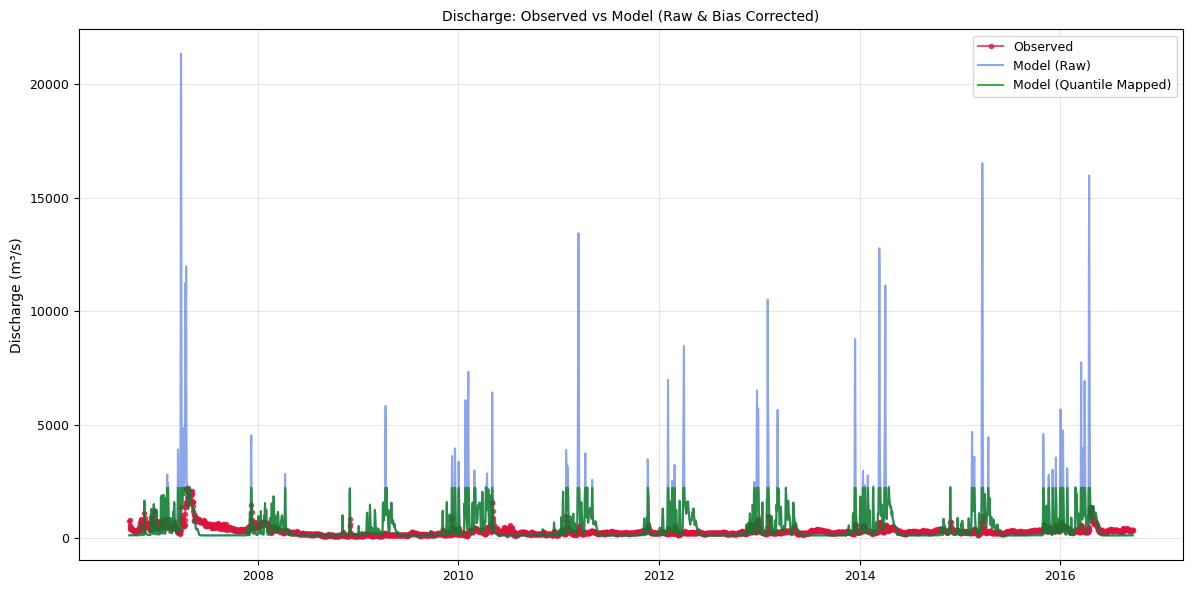


✅ Saved daily time series to discharge_bias_correction.xlsx


In [51]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ========== 1. Load Data ==========
model_path = r"combined_dis24_2.nc"
obs_path = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# --- Model Data ---
ds = xr.open_dataset(model_path)
dis = ds['dis24']
model_point = dis.sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method="nearest",
    tolerance=0.5
)
model_ts = model_point.to_dataframe(name='model_discharge')

# --- Observation Data ---
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df = obs_df.rename(columns={'Value': 'obs_discharge'})
obs_df.set_index('Date', inplace=True)
obs_df = obs_df[~obs_df.index.duplicated(keep='first')]  # Remove duplicate dates

# ========== 2. Align Data ==========
common_start = max(model_ts.index.min(), obs_df.index.min())
common_end = min(model_ts.index.max(), obs_df.index.max())
model_common = model_ts.loc[common_start:common_end]
obs_common = obs_df.loc[common_start:common_end]

# Drop any NaNs (required for quantile mapping)
aligned = pd.concat([model_common, obs_common], axis=1, join='inner').dropna()
model_vals = aligned['model_discharge'].values.reshape(-1, 1)
obs_vals = aligned['obs_discharge'].values.reshape(-1, 1)

# ========== 3. Quantile Mapping Bias Correction ==========
qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(100, len(obs_vals)))
qt.fit(obs_vals)
model_qm = qt.inverse_transform(qt.transform(model_vals)).flatten()
aligned['model_discharge_qm'] = model_qm

# ========== 4. Statistics ==========
def print_stats(label, obs, mod):
    mae = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse = 1 - np.sum((obs - mod) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
    print(f"{label}:")
    print(f"  MAE:  {mae:.2f} m³/s")
    print(f"  RMSE: {rmse:.2f} m³/s")
    print(f"  NSE:  {nse:.3f}")

print("\n=== Statistics BEFORE Bias Correction ===")
print_stats("Model vs Obs", aligned['obs_discharge'], aligned['model_discharge'])

print("\n=== Statistics AFTER Quantile Mapping Bias Correction ===")
print_stats("QM Model vs Obs", aligned['obs_discharge'], aligned['model_discharge_qm'])

# ========== 5. Plot ==========
plt.figure(figsize=(12, 6))
plt.plot(aligned.index, aligned['obs_discharge'], label='Observed', color='crimson', marker='o', markersize=3, alpha=0.7)
plt.plot(aligned.index, aligned['model_discharge'], label='Model (Raw)', color='royalblue', alpha=0.6)
plt.plot(aligned.index, aligned['model_discharge_qm'], label='Model (Quantile Mapped)', color='green', alpha=0.7)
plt.title('Discharge: Observed vs Model (Raw & Bias Corrected)')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== 6. SAVE TO EXCEL (REVISED) ==========

# 6.1 Build an export DataFrame with explicit columns
export_df = pd.DataFrame({
    'Date':                   aligned.index,
    'Observed (m3/s)':        aligned['obs_discharge'].values,
    'Raw Model (m3/s)':       aligned['model_discharge'].values,
    'QM Corrected (m3/s)':    aligned['model_discharge_qm'].values
})

# 6.2 Set Date as the index (optional—Excel will still show it)
export_df.set_index('Date', inplace=True)

# 6.3 Write to Excel
excel_path = 'discharge_bias_correction.xlsx'
export_df.to_excel(excel_path, sheet_name='Daily', engine='openpyxl')

print(f"\n✅ Saved daily time series to {excel_path}")


=== Statistics BEFORE Bias Correction ===
Raw Model vs Obs     | MAE:   420.78 | RMSE:  1115.89 | NSE: -39.847

=== Statistics AFTER QM Bias Correction ===
QM Model vs Obs      | MAE:   312.62 | RMSE:   520.70 | NSE:  -7.894


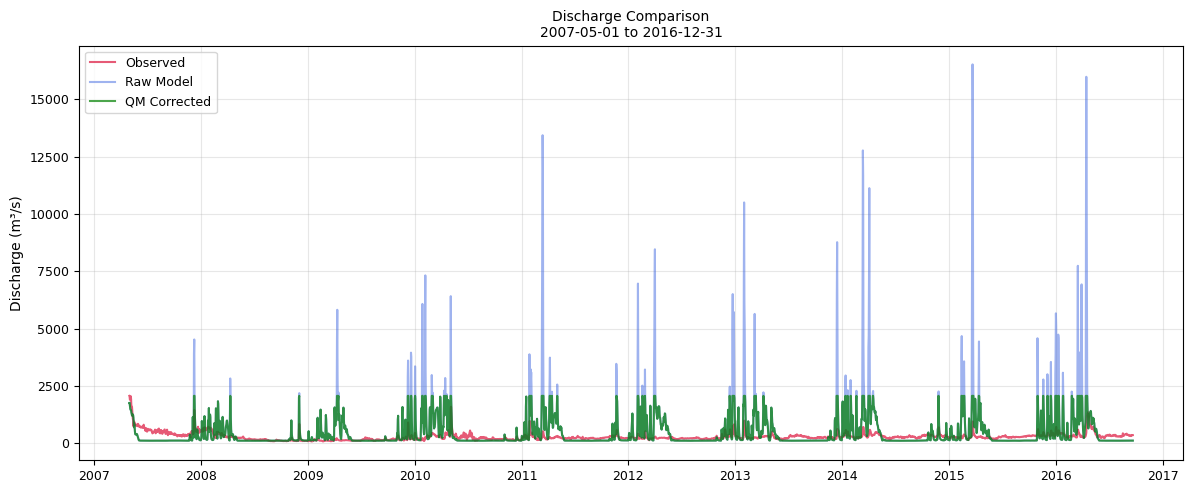


✅ Time series saved to: discharge_bias_correction.xlsx


In [53]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ========== 1. CONFIGURATION ==========
model_path   = r"combined_dis24_2.nc"
obs_path     = r"Observation_Data_Ahvaz.csv"
target_lat   = 31.333333
target_lon   = 48.683333

# Fixed analysis period
start_date   = "2007-05-01"
end_date     = "2016-12-31"

# Output Excel file
excel_path   = "discharge_bias_correction.xlsx"

# ========== 2. LOAD MODEL DATA ==========
ds = xr.open_dataset(model_path)
dis = ds["dis24"]
model_point = dis.sel(
    latitude=target_lat, longitude=target_lon,
    method="nearest", tolerance=0.5
)
model_ts = model_point.to_dataframe(name="model_discharge")

# ========== 3. LOAD OBSERVATION DATA ==========
obs_df = pd.read_csv(obs_path)
obs_df["Date"] = pd.to_datetime(obs_df["Date"], errors="coerce")
obs_df = obs_df.rename(columns={"Value":"obs_discharge"})
obs_df = obs_df.set_index("Date")
obs_df = obs_df[~obs_df.index.duplicated(keep="first")]

# ========== 4. SUBSET TO FIXED PERIOD ==========
model_common = model_ts.loc[start_date : end_date]
obs_common   = obs_df.loc[start_date : end_date]

# ========== 5. ALIGN & DROP MISSING ==========
aligned = pd.concat([model_common, obs_common], axis=1, join="inner")
aligned = aligned.dropna(subset=["model_discharge","obs_discharge"])

# ========== 6. QUANTILE MAPPING ==========
# Prepare arrays
model_vals = aligned["model_discharge"].values.reshape(-1,1)
obs_vals   = aligned["obs_discharge"].values.reshape(-1,1)

# Fit & transform
qt = QuantileTransformer(
    output_distribution="normal",
    n_quantiles=min(100, len(aligned))
).fit(obs_vals)

model_qm = qt.inverse_transform(qt.transform(model_vals)).flatten()
aligned["model_discharge_qm"] = model_qm

# ========== 7. STATISTICS ==========
def print_stats(label, obs, sim):
    mae  = mean_absolute_error(obs, sim)
    rmse = np.sqrt(mean_squared_error(obs, sim))
    nse  = 1 - np.sum((obs-sim)**2)/np.sum((obs-np.mean(obs))**2)
    print(f"{label:20s} | MAE: {mae:8.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

print("\n=== Statistics BEFORE Bias Correction ===")
print_stats("Raw Model vs Obs",
            aligned["obs_discharge"], aligned["model_discharge"])

print("\n=== Statistics AFTER QM Bias Correction ===")
print_stats("QM Model vs Obs",
            aligned["obs_discharge"], aligned["model_discharge_qm"])

# ========== 8. PLOT RESULTS ==========
plt.figure(figsize=(12,5))
plt.plot(aligned.index, aligned["obs_discharge"],
         label="Observed",   color="crimson", alpha=0.7)
plt.plot(aligned.index, aligned["model_discharge"],
         label="Raw Model",  color="royalblue", alpha=0.5)
plt.plot(aligned.index, aligned["model_discharge_qm"],
         label="QM Corrected", color="green", alpha=0.7)
plt.title(f"Discharge Comparison\n{start_date} to {end_date}")
plt.ylabel("Discharge (m³/s)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========== 9. SAVE TO EXCEL ==========
export_df = pd.DataFrame({
    "Date":                 aligned.index,
    "Observed (m3/s)":      aligned["obs_discharge"].values,
    "Raw Model (m3/s)":     aligned["model_discharge"].values,
    "QM Corrected (m3/s)":  aligned["model_discharge_qm"].values
})
export_df = export_df.set_index("Date")
export_df.to_excel(excel_path, sheet_name="Daily", engine="openpyxl")
print(f"\n✅ Time series saved to: {excel_path}")

Data aligned from 2006-09-21 to 2016-09-21 (3654 days)

=== RAW MODEL vs OBS ===
Raw Model                 | MAE:  449.91 | RMSE:  1241.72 | NSE: -32.051

Running 5-fold time-series CV with Random Forest...
 Fold 1/5 | MAE:  375.21 | RMSE:   411.84 | NSE: -30.477
 Fold 2/5 | MAE:  171.18 | RMSE:   279.85 | NSE:  -3.715
 Fold 3/5 | MAE:  110.40 | RMSE:   182.01 | NSE:  -2.678
 Fold 4/5 | MAE:   94.67 | RMSE:   134.22 | NSE:  -1.731
 Fold 5/5 | MAE:   98.75 | RMSE:   174.01 | NSE:  -0.263
 CV mean              | MAE:  170.04 | RMSE:   236.38 | NSE:  -7.773

Training final Random Forest on full record...

=== RANDOM FOREST CORRECTED ===
RF Corrected              | MAE:   65.96 | RMSE:    94.00 | NSE:   0.811


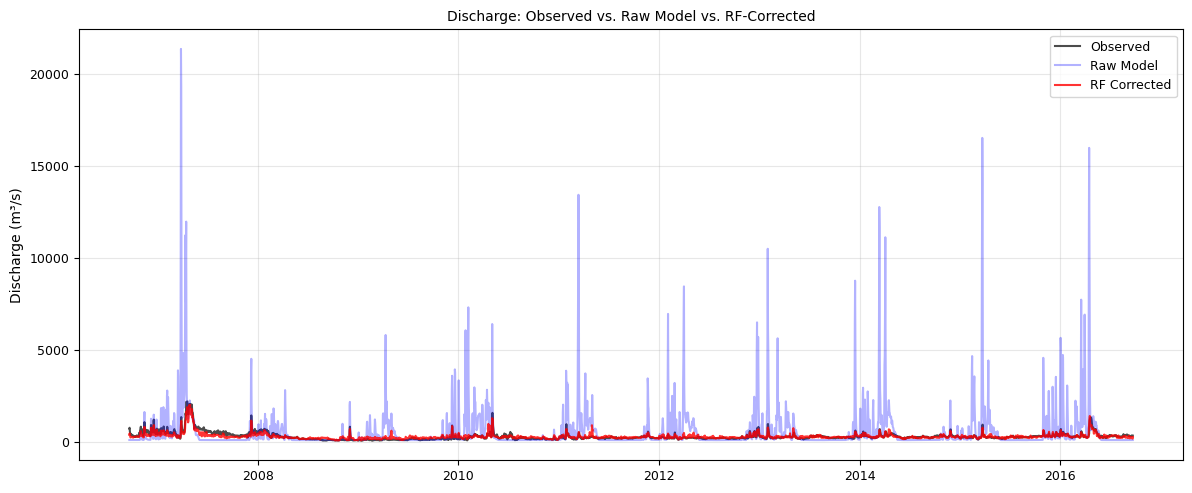

In [56]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ======== 1. CONFIGURATION ========
model_path = r"combined_dis24_2.nc"
obs_path   = r"Observation_Data_Ahvaz.csv"
target_lat = 31.333333
target_lon = 48.683333

# Random Forest hyperparameters
RF_PARAMS = {
    'n_estimators': 300,
    'max_depth': 12,
    'random_state': 42,
    'n_jobs': -1
}

# Number of time-series CV splits
N_SPLITS = 5

# ======== 2. LOAD & ALIGN DATA ========
# 2.1 Load model discharge and select nearest grid cell
ds       = xr.open_dataset(model_path)
dis24    = ds['dis24']
model_pt = dis24.sel(
    latitude=target_lat,
    longitude=target_lon,
    method='nearest',
    tolerance=0.5
)
model_ts = model_pt.to_dataframe(name='model_discharge')

# 2.2 Load observed discharge
obs_df = pd.read_csv(obs_path)
obs_df['Date'] = pd.to_datetime(obs_df['Date'], errors='coerce')
obs_df.rename(columns={'Value': 'obs_discharge'}, inplace=True)
obs_df.set_index('Date', inplace=True)

# 2.3 Align on common period and drop any NaNs
start = max(model_ts.index.min(), obs_df.index.min())
end   = min(model_ts.index.max(), obs_df.index.max())
df = pd.concat([
    model_ts.loc[start:end],
    obs_df.loc[start:end]
], axis=1, join='inner').dropna()

print(f"Data aligned from {start.date()} to {end.date()} ({len(df)} days)")

# Helper to print stats
def print_stats(label, obs, mod):
    mae  = mean_absolute_error(obs, mod)
    rmse = np.sqrt(mean_squared_error(obs, mod))
    nse  = 1 - np.sum((obs-mod)**2) / np.sum((obs-np.mean(obs))**2)
    print(f"{label:25s} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Raw model performance
print("\n=== RAW MODEL vs OBS ===")
print_stats("Raw Model", df['obs_discharge'], df['model_discharge'])

# ======== 3. FEATURE ENGINEERING ========
# Simple features: raw model discharge, month, day-of-year
X = pd.DataFrame({
    'model_discharge': df['model_discharge'],
    'month':           df.index.month,
    'dayofyear':       df.index.dayofyear
}, index=df.index)

y = df['obs_discharge']

# ======== 4. TIME-SERIES CROSS-VALIDATION ========
tscv = TimeSeriesSplit(n_splits=N_SPLITS)
cv_scores = []

print(f"\nRunning {N_SPLITS}-fold time-series CV with Random Forest...")
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf = RandomForestRegressor(**RF_PARAMS)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    nse  = 1 - np.sum((y_test-y_pred)**2) / np.sum((y_test-np.mean(y_test))**2)
    cv_scores.append((mae, rmse, nse))

    print(f" Fold {fold}/{N_SPLITS} | MAE: {mae:7.2f} | RMSE: {rmse:8.2f} | NSE: {nse:7.3f}")

# Aggregate CV scores
mae_cv, rmse_cv, nse_cv = np.mean(cv_scores, axis=0)
print(f" CV mean              | MAE: {mae_cv:7.2f} | RMSE: {rmse_cv:8.2f} | NSE: {nse_cv:7.3f}")

# ======== 5. FINAL MODEL FIT & PREDICT ========
print("\nTraining final Random Forest on full record...")
rf_final = RandomForestRegressor(**RF_PARAMS)
rf_final.fit(X, y)

df['model_rf'] = rf_final.predict(X)

print("\n=== RANDOM FOREST CORRECTED ===")
print_stats("RF Corrected", df['obs_discharge'], df['model_rf'])

# ======== 6. PLOT RESULTS ========
plt.figure(figsize=(12,5))
plt.plot(df.index, df['obs_discharge'],   'k-',  label='Observed', alpha=0.7)
plt.plot(df.index, df['model_discharge'],'b-',  label='Raw Model', alpha=0.3)
plt.plot(df.index, df['model_rf'],        'r-',  label='RF Corrected', alpha=0.8)
plt.legend()
plt.title("Discharge: Observed vs. Raw Model vs. RF-Corrected")
plt.ylabel("Discharge (m³/s)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()